In [1]:
import pandas as pd

#2015 skill data 불러오기
data_path = "../datasets/2015_100_skill_builders_main_problems.csv"

pd_data = pd.read_csv(data_path, encoding="ISO-8859-1")

pd_data.head()

,user_id,log_id,sequence_id,correct
0,50121,167478035,7014,0.0
1,50121,167478043,7014,1.0
2,50121,167478053,7014,1.0
3,50121,167478069,7014,1.0
4,50964,167478041,7014,1.0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

#랜덤으로 섞기
pd_data = shuffle(pd_data)

#일단 전체 데이터를 랜덤으로 8:2로 분리하기
train_dataset, test_dataset = train_test_split(pd_data, test_size = 0.2)

#test_set부터 먼저 설정하기
test_path = "../datasets/coldstart_datasets/coldstart1_2015_testdatasets.csv"
test_dataset.to_csv(test_path)

In [ ]:
#traindata는 학생 1명, 2명 이런식으로 만들기

In [4]:
train_dataset.head()

,user_id,log_id,sequence_id,correct
509251,331291,170872861,5962,0.0
549617,337296,171238302,39162,0.0
15303,166888,163351855,6473,1.0
594348,341870,174419990,37570,0.0
312358,290196,165732062,5976,1.0


In [5]:
train_dataset['user_id'].unique()

array([331291, 337296, 166888, ..., 335373, 361273, 346183])

In [18]:
train_dataset['user_id'].value_counts().values

array([513, 497, 421, ...,   1,   1,   1])

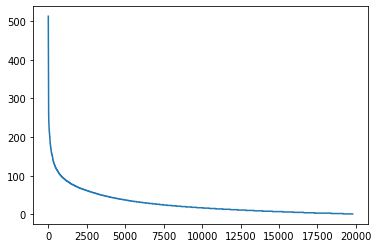

In [19]:
import matplotlib.pyplot as plt

plt.plot(train_dataset['user_id'].value_counts().values)
plt.show()

In [20]:
#평균을 내보니 28.64 정도의 수치가 나옴
import numpy as np

np.mean(train_dataset['user_id'].value_counts().values)

28.641640984186328

In [27]:
#20명 이상 30명 아하의 학습자들의 데이터를 train data로 만들기

train_user = train_dataset['user_id'].value_counts().index.to_list()
train_values = train_dataset['user_id'].value_counts().values.tolist()

print(type(train_user))
print(type(train_values))

index_up20_un30 = []

for idx, user in enumerate(train_user):
    if train_values[idx] >= 20 | train_values[idx] <=30:
        index_up20_un30.append(user)

#20명 이상 30명 이하의 문항 반응을 가진 학습자 명단을 확인함
print(len(index_up20_un30))

<class 'list'>
<class 'list'>
1878


In [28]:
train_dataset = train_dataset[
    train_dataset['user_id'].isin(index_up20_un30)
    ]

train_dataset.head()

,user_id,log_id,sequence_id,correct
519660,334001,173010850,10293,0.0
706631,360022,175108538,13935,0.0
631209,344501,173248622,164496,1.0
239123,283743,166125663,7158,1.0
451446,327067,170571697,15528,0.0


In [29]:
train_dataset.describe()

,user_id,log_id,sequence_id,correct
count,45107.000000,4.510700e+04,45107.000000,45107.000000
mean,298623.813399,1.695961e+08,21325.917153,0.737624
std,48716.931010,3.603060e+06,35386.119568,0.429549
min,76247.000000,1.631634e+08,5898.000000,0.000000
25%,279118.000000,1.659978e+08,7020.000000,0.333333
50%,307171.000000,1.704269e+08,10195.000000,1.000000
75%,336856.000000,1.725247e+08,21257.000000,1.000000
max,361236.000000,1.753282e+08,236309.000000,1.000000


In [34]:
#여기서 random으로 인덱스를 랜덤으로 20개를 정하기
import random

random_index = random.sample(index_up20_un30, 20)

random_index

[345366,
 346234,
 325008,
 307808,
 360022,
 328238,
 273147,
 339387,
 329892,
 343297,
 343822,
 287773,
 331524,
 326915,
 342768,
 232888,
 354929,
 325409,
 326546,
 279824]

In [35]:
coldstart1_train_folder_path = "../datasets/coldstart_datasets/coldstart1_2015_traindatasets"

In [37]:
#한명의 데이터만 가져와서 csv로 저장
num1_path = coldstart1_train_folder_path + "/coldstart1_num1.csv"

num1_list = [random_index[0]]
coldstart1_train_num1 = train_dataset[train_dataset['user_id'].isin(num1_list)]

coldstart1_train_num1.to_csv(num1_path)

In [39]:
for i in range(len(random_index)):
    num_path = coldstart1_train_folder_path + "/coldstart1_num" + str(i) + ".csv"
    num_list = []

    for j in range(i+1):
        num_list.append(random_index[j])

    coldstart_train_num = train_dataset[train_dataset['user_id'].isin(num_list)]

    coldstart_train_num.to_csv(num_path)

i:  0
i, j:  0 0
i:  1
i, j:  1 0
i, j:  1 1
i:  2
i, j:  2 0
i, j:  2 1
i, j:  2 2
i:  3
i, j:  3 0
i, j:  3 1
i, j:  3 2
i, j:  3 3
i:  4
i, j:  4 0
i, j:  4 1
i, j:  4 2
i, j:  4 3
i, j:  4 4
i:  5
i, j:  5 0
i, j:  5 1
i, j:  5 2
i, j:  5 3
i, j:  5 4
i, j:  5 5
i:  6
i, j:  6 0
i, j:  6 1
i, j:  6 2
i, j:  6 3
i, j:  6 4
i, j:  6 5
i, j:  6 6
i:  7
i, j:  7 0
i, j:  7 1
i, j:  7 2
i, j:  7 3
i, j:  7 4
i, j:  7 5
i, j:  7 6
i, j:  7 7
i:  8
i, j:  8 0
i, j:  8 1
i, j:  8 2
i, j:  8 3
i, j:  8 4
i, j:  8 5
i, j:  8 6
i, j:  8 7
i, j:  8 8
i:  9
i, j:  9 0
i, j:  9 1
i, j:  9 2
i, j:  9 3
i, j:  9 4
i, j:  9 5
i, j:  9 6
i, j:  9 7
i, j:  9 8
i, j:  9 9
i:  10
i, j:  10 0
i, j:  10 1
i, j:  10 2
i, j:  10 3
i, j:  10 4
i, j:  10 5
i, j:  10 6
i, j:  10 7
i, j:  10 8
i, j:  10 9
i, j:  10 10
i:  11
i, j:  11 0
i, j:  11 1
i, j:  11 2
i, j:  11 3
i, j:  11 4
i, j:  11 5
i, j:  11 6
i, j:  11 7
i, j:  11 8
i, j:  11 9
i, j:  11 10
i, j:  11 11
i:  12
i, j:  12 0
i, j:  12 1
i, j:  12 2